In [1]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pickle


# f2 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/val_data', 'rb')
# f2 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/val_data', 'rb')
# X_sequence_val, X_feature_val, X_image_val, Y_val = pickle.load(f2)
# f2.close()
# f3 = open('data/split_0.80_0.10_0.10_aug_to_5000_down_sample_True_instance1/test_data', 'rb')
f3 = open('data/split_random_cadence_0.60_0.30_0.10_aug_to_1875_down_sample_True_instance0-9/test_data', 'rb')
# X_sequence_test, X_feature_test, X_image_test, Y_test = pickle.load(f3)
X_sequence_test, X_feature_test, Y_test = pickle.load(f3)
f3.close()
from keras.preprocessing.sequence import pad_sequences
X_sequence_test_paded = pad_sequences(X_sequence_test, dtype='float', padding='post', value = np.nan)
# X_sequence_val_paded = pad_sequences(X_sequence_val, dtype='float', padding='post', value = np.nan)
from util import preprocess
X_sequence_test_trimed = preprocess(X_sequence_test_paded)
# X_sequence_val_trimed = preprocess(X_sequence_val_paded)

def build_channel(data):
    X = []
    for image in data:
        X.append(image.reshape(128, 128, 1))
    return X
# X_image_test = np.array(build_channel(X_image_test))
# X_image_val = np.array(build_channel(X_image_val))
X_feature_test = np.array(X_feature_test)
# X_feature_val = np.array(X_feature_val)
Y_test = np.array(Y_test)-1
# Y_val = np.array(Y_val)-1

In [3]:
models = []
best_list_0=[18,8,10,13,10,16,8,16,12,11]
best_list_1=[17,25,16,10,4,25,22,13,21,10]
best_list_2=[11,10,11,7,14,10,16,9,21,11]
best_list_3=[10,26,13,16,15,16,13,12,11,21]
for i in range(0,10):
    lodaed_model = keras.models.load_model('models/bagging_random_cadence_0.60_0.30_0.10/rnn_with_feature%d/model_4'%i)
    # lodaed_model = keras.models.load_model('models/fold2/bagging0/rnn_with_feature%d/model_%d'%(i,best_list_2[i]))
    models.append(lodaed_model)

2022-10-27 20:14:49.077635: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 20:14:50.546266: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 431 MB memory:  -> device: 0, name: GeForce RTX 3090, pci bus id: 0000:73:00.0, compute capability: 8.6
2022-10-27 20:14:50.551617: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 21875 MB memory:  -> device: 1, name: GeForce RTX 3090, pci bus id: 0000:d5:00.0, compute capability: 8.6
2022-10-27 20:14:54.997152: W tensorflow/core/common_runtime/graph_constructor.cc:803] Node 'cond/while' has 13 outputs bu

2022-10-27 20:17:57.249671: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8401
2022-10-27 20:17:57.249920: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
Could not load symbol cublasGetSmCountTarget from libcublas.so.11. Error: /home/zhkang/softwares/anaconda3/envs/DL/lib/python3.9/site-packages/tensorflow/python/../../../../libcublas.so.11: undefined symbol: cublasGetSmCountTarget


(11, 11)
Normalized confusion matrix
[[8.18812645e-01 3.85505012e-03 1.77332305e-02 1.09483423e-01
  2.31303007e-03 0.00000000e+00 3.08404009e-03 0.00000000e+00
  0.00000000e+00 4.47185813e-02 0.00000000e+00]
 [1.77777778e-03 8.10666667e-01 1.67111111e-01 8.88888889e-04
  8.88888889e-03 8.88888889e-04 5.33333333e-03 0.00000000e+00
  4.44444444e-03 0.00000000e+00 0.00000000e+00]
 [4.66666667e-02 1.06666667e-01 8.33333333e-01 1.33333333e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.80392157e-02 0.00000000e+00 0.00000000e+00 8.82352941e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.96078431e-02 0.00000000e+00]
 [7.09219858e-04 3.54609929e-04 3.54609929e-04 1.77304965e-04
  7.69148936e-01 5.99290780e-02 1.61524823e-01 8.86524823e-04
  5.31914894e-04 8.86524823e-04 5.49645390e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.99704142e-02 9.69674556e-01 5.9171597

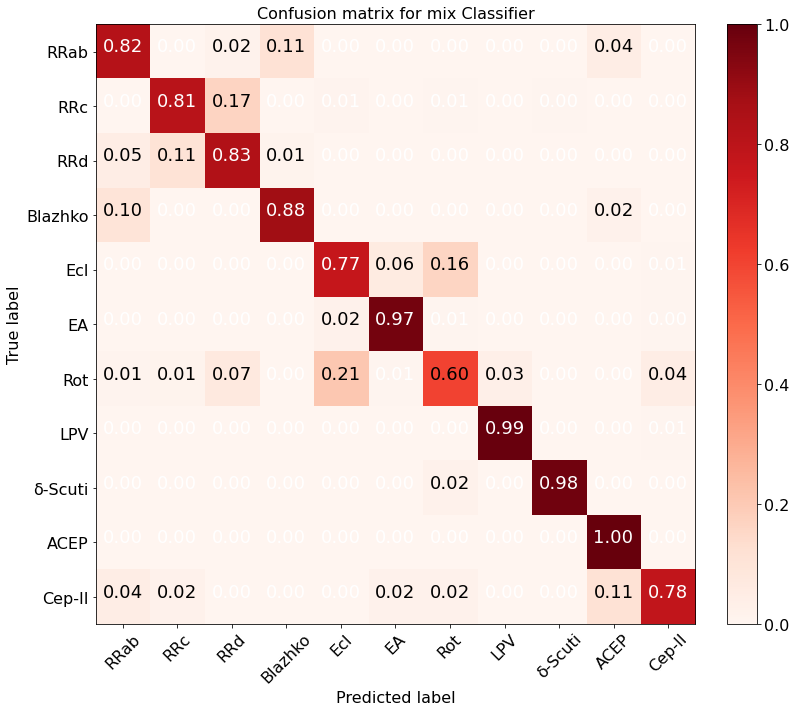

In [5]:

# def generate_batch(X_sequence, X_image,  X_feature, Y, batch_size):
def generate_batch(X_sequence,  X_feature, Y, batch_size):
    idx = 0
    batch_num = len(Y)/batch_size
    while idx < batch_num:
        batch_x_sequence = X_sequence[idx * batch_size : (idx + 1) * batch_size]
        batch_x_feature = X_feature[idx * batch_size : (idx + 1) * batch_size]
        batch_y = Y[idx * batch_size : (idx + 1) * batch_size]
        yield batch_x_sequence,  batch_x_feature, batch_y
        idx += 1

# test_gen = generate_batch(X_sequence_test_trimed, X_image_test, X_feature_test, Y_test, 128)      
test_gen = generate_batch(X_sequence_test_trimed, X_feature_test, Y_test, 128)      

y_label = Y_test

# val_gen = generate_batch(X_sequence_val_trimed, X_image_val, X_feature_val, Y_val, 128)      
# y_label = Y_val


y_predict = np.array([])
# for x_sequence, x_image, x_feature, y in test_gen:
for x_sequence,  x_feature, y in test_gen:
    results = []
    for model in models:
    # for i in (9,):
    #     model = models[i]
        results.append(model.predict({'sequence':x_sequence, 
                                        # 'image':x_image,
                                        'feature':x_feature}))
    average_result = np.sum(results, axis=0)
    y_predict = np.concatenate([y_predict, np.argmax(average_result, axis=-1)])
y_label = y_label.astype(np.int32) 
y_predict = y_predict.astype(np.int32) 
cm = confusion_matrix(y_true=y_label, y_pred=y_predict, normalize='true')
print(cm.shape)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(values_format='.2g')

classes = ['RRab', 'RRc','RRd', 'Blazhko','Ecl', 'EA' , 'Rot', 'LPV','δ-Scuti','ACEP', 'Cep-II']

from util import cm_plot

plotting = cm_plot(cm, classes_types=classes, classifier_model='mix Classifier', nClasses=11,
                    cmap=plt.cm.Blues)